# Lab№ 2 “EDA and Supervised Learning”

Olena Babii (IASA student, DA-01)

In [210]:
import pandas as pd
# first of all importing pandas

In [211]:
# loading data from the CSV file "application_train.csv" into the train_data variable
train_data = pd.read_csv("application_train.csv")
# DataFrame size output
print(train_data.shape)
# printing the first 7 lines
train_data.head(7)

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE   
0         351000.0    Unaccompanied               Working  \
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
0  Secondary / secondary special  Single / not married  House / apartment  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION   
0                    0.018801       -9461           -637            -3648.0  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE   
0            -2120          NaN           1               1                0  \
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   
6             -619         17.0           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS   
0                 1           1           0        Laborers              1.0  \
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0  

In [212]:
# display all features with their data types
train_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [213]:
# same for the test data
test_data = pd.read_csv("application_test.csv")
print(test_data.shape)
test_data.head(7)

(48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
0      100001         Cash loans           F            N               Y  \
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   
5      100042         Cash loans           F            Y               Y   
6      100057         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE   
0             0          135000.0    568800.0      20560.5         450000.0  \
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   
5             0          270000.0    959688.0      34600.5         810000.0   
6             2          180000.0    499221.0      22117.5         373500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE   
0   Unaccompanied          Working               Higher education  \
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   
5   Unaccompanied    State servant  Secondary / secondary special   
6   Unaccompanied          Working               Higher education   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE   
0            Married  House / apartment                    0.018850  \
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   
5            Married  House / apartment                    0.025164   
6            Married  House / apartment                    0.022800   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE   
0      -19241          -2329            -5170.0             -812          NaN  \
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   
5      -18604         -12009            -6116.0            -2027         10.0   
6      -16685          -2580           -10125.0             -241          3.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE   
0           1               1                0                 1           0  \
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   
5           1               1                0                 1           1   
6           1               1                0                 1           0   

   FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT   
0           1                    NaN              2.0                     2  \
1           0     Low-skill Laborers              2.0                     2   
2           0                Drivers              2.0                     2   
3           0            

In [214]:
# calculate the total number of null values per column
total = train_data.isnull().sum().sort_values(ascending=False)

# calculate the percentage of null values per column
percent = (train_data.isnull().sum() / train_data.isnull().count() * 100).sort_values(ascending=False)

# create a new DataFrame combining the total number and percentage of null values
missed_train = pd.concat([total, percent], axis=1, keys=["Count", "%"])

missed_train

Count          %
COMMONAREA_MEDI               214865  69.872297
COMMONAREA_AVG                214865  69.872297
COMMONAREA_MODE               214865  69.872297
NONLIVINGAPARTMENTS_MODE      213514  69.432963
NONLIVINGAPARTMENTS_AVG       213514  69.432963
NONLIVINGAPARTMENTS_MEDI      213514  69.432963
FONDKAPREMONT_MODE            210295  68.386172
LIVINGAPARTMENTS_MODE         210199  68.354953
LIVINGAPARTMENTS_AVG          210199  68.354953
LIVINGAPARTMENTS_MEDI         210199  68.354953
FLOORSMIN_AVG                 208642  67.848630
FLOORSMIN_MODE                208642  67.848630
FLOORSMIN_MEDI                208642  67.848630
YEARS_BUILD_MEDI              204488  66.497784
YEARS_BUILD_MODE              204488  66.497784
YEARS_BUILD_AVG               204488  66.497784
OWN_CAR_AGE                   202929  65.990810
LANDAREA_MEDI                 182590  59.376738
LANDAREA_MODE                 182590  59.376738
LANDAREA_AVG                  182590  59.376738
BASEMENTAREA_MEDI             179943  58.515956
BASEMENTAREA_AVG              179943  58.515956
BASEMENTAREA_MODE             179943  58.515956
EXT_SOURCE_1                  173378  56.381073
NONLIVINGAREA_MODE            169682  55.179164
NONLIVINGAREA_AVG             169682  55.179164
NONLIVINGAREA_MEDI            169682  55.179164
ELEVATORS_MEDI                163891  53.295980
ELEVATORS_AVG                 163891  53.295980
ELEVATORS_MODE                163891  53.295980
WALLSMATERIAL_MODE            156341  50.840783
APARTMENTS_MEDI               156061  50.749729
APARTMENTS_AVG                156061  50.749729
APARTMENTS_MODE               156061  50.749729
ENTRANCES_MEDI                154828  50.348768
ENTRANCES_AVG                 154828  50.348768
ENTRANCES_MODE                154828  50.348768
LIVINGAREA_AVG                154350  50.193326
LIVINGAREA_MODE               154350  50.193326
LIVINGAREA_MEDI               154350  50.193326
HOUSETYPE_MODE                154297  50.176091
FLOORSMAX_MODE                153020  49.760822
FLOORSMAX_MEDI                153020  49.760822
FLOORSMAX_AVG                 153020  49.760822
YEARS_BEGINEXPLUATATION_MODE  150007  48.781019
YEARS_BEGINEXPLUATATION_MEDI  150007  48.781019
YEARS_BEGINEXPLUATATION_AVG   150007  48.781019
TOTALAREA_MODE                148431  48.268517
EMERGENCYSTATE_MODE           145755  47.398304
OCCUPATION_TYPE                96391  31.345545
EXT_SOURCE_3                   60965  19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     41519  13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519  13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519  13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519  13.501631
AMT_REQ_CREDIT_BUREAU_QRT      41519  13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519  13.501631
NAME_TYPE_SUITE                 1292   0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021   0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021   0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021   0.332021
EXT_SOURCE_2                     660   0.214626
AMT_GOODS_PRICE                  278   0.090403
AMT_ANNUITY                       12   0.003902
CNT_FAM_MEMBERS                    2   0.000650
DAYS_LAST_PHONE_CHANGE             1   0.000325
CNT_CHILDREN                       0   0.000000
FLAG_DOCUMENT_8                    0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
CODE_GENDER                        0   0.000000
FLAG_OWN_CAR                       0   0.000000
FLAG_DOCUMENT_2                    0   0.000000
FLAG_DOCUMENT_3                    0   0.000000
FLAG_DOCUMENT_4                    0   0.000000
FLAG_DOCUMENT_5                    0   0.000000
FLAG_DOCUMENT_6                    0   0.000000
FLAG_DOCUMENT_7                    0   0.000000
FLAG_DOCUMENT_9                    0   0.000000
FLAG_DOCUMENT_21                   0   0.000000
FLAG_DOCUMENT_10                   0   0.000000
FLAG_DOCUMENT_11                   0   0.000000
FLAG_OWN_REALTY                    0   0.000000

In [216]:
# calculate the total number of null values per column
total_test = test_data.isnull().sum().sort_values(ascending=False)

# calculate the percentage of null values per column
percent_test = (test_data.isnull().sum() / test_data.isnull().count() * 100).sort_values(ascending=False)

# create a new DataFrame combining the total number and percentage of null values
missed_test = pd.concat([total_test, percent_test], axis=1, keys=["Count", "%"])

missed_test

Count          %
COMMONAREA_AVG                33495  68.716150
COMMONAREA_MODE               33495  68.716150
COMMONAREA_MEDI               33495  68.716150
NONLIVINGAPARTMENTS_AVG       33347  68.412523
NONLIVINGAPARTMENTS_MODE      33347  68.412523
NONLIVINGAPARTMENTS_MEDI      33347  68.412523
FONDKAPREMONT_MODE            32797  67.284179
LIVINGAPARTMENTS_AVG          32780  67.249302
LIVINGAPARTMENTS_MODE         32780  67.249302
LIVINGAPARTMENTS_MEDI         32780  67.249302
FLOORSMIN_MEDI                32466  66.605121
FLOORSMIN_AVG                 32466  66.605121
FLOORSMIN_MODE                32466  66.605121
OWN_CAR_AGE                   32312  66.289184
YEARS_BUILD_AVG               31818  65.275726
YEARS_BUILD_MEDI              31818  65.275726
YEARS_BUILD_MODE              31818  65.275726
LANDAREA_MEDI                 28254  57.964057
LANDAREA_AVG                  28254  57.964057
LANDAREA_MODE                 28254  57.964057
BASEMENTAREA_MEDI             27641  56.706466
BASEMENTAREA_AVG              27641  56.706466
BASEMENTAREA_MODE             27641  56.706466
NONLIVINGAREA_AVG             26084  53.512227
NONLIVINGAREA_MODE            26084  53.512227
NONLIVINGAREA_MEDI            26084  53.512227
ELEVATORS_MODE                25189  51.676104
ELEVATORS_MEDI                25189  51.676104
ELEVATORS_AVG                 25189  51.676104
WALLSMATERIAL_MODE            23893  49.017315
APARTMENTS_MODE               23887  49.005006
APARTMENTS_MEDI               23887  49.005006
APARTMENTS_AVG                23887  49.005006
HOUSETYPE_MODE                23619  48.455194
ENTRANCES_MODE                23579  48.373133
ENTRANCES_AVG                 23579  48.373133
ENTRANCES_MEDI                23579  48.373133
LIVINGAREA_MEDI               23552  48.317742
LIVINGAREA_MODE               23552  48.317742
LIVINGAREA_AVG                23552  48.317742
FLOORSMAX_AVG                 23321  47.843837
FLOORSMAX_MEDI                23321  47.843837
FLOORSMAX_MODE                23321  47.843837
YEARS_BEGINEXPLUATATION_AVG   22856  46.889874
YEARS_BEGINEXPLUATATION_MEDI  22856  46.889874
YEARS_BEGINEXPLUATATION_MODE  22856  46.889874
TOTALAREA_MODE                22624  46.413918
EMERGENCYSTATE_MODE           22209  45.562531
EXT_SOURCE_1                  20532  42.122107
OCCUPATION_TYPE               15605  32.014197
EXT_SOURCE_3                   8668  17.782701
AMT_REQ_CREDIT_BUREAU_DAY      6049  12.409732
AMT_REQ_CREDIT_BUREAU_WEEK     6049  12.409732
AMT_REQ_CREDIT_BUREAU_HOUR     6049  12.409732
AMT_REQ_CREDIT_BUREAU_MON      6049  12.409732
AMT_REQ_CREDIT_BUREAU_QRT      6049  12.409732
AMT_REQ_CREDIT_BUREAU_YEAR     6049  12.409732
NAME_TYPE_SUITE                 911   1.868948
DEF_30_CNT_SOCIAL_CIRCLE         29   0.059495
OBS_30_CNT_SOCIAL_CIRCLE         29   0.059495
OBS_60_CNT_SOCIAL_CIRCLE         29   0.059495
DEF_60_CNT_SOCIAL_CIRCLE         29   0.059495
AMT_ANNUITY                      24   0.049237
EXT_SOURCE_2                      8   0.016412
FLAG_DOCUMENT_21                  0   0.000000
FLAG_DOCUMENT_20                  0   0.000000
CODE_GENDER                       0   0.000000
FLAG_OWN_CAR                      0   0.000000
FLAG_OWN_REALTY                   0   0.000000
CNT_CHILDREN                      0   0.000000
DAYS_LAST_PHONE_CHANGE            0   0.000000
FLAG_DOCUMENT_2                   0   0.000000
FLAG_DOCUMENT_3                   0   0.000000
FLAG_DOCUMENT_4                   0   0.000000
FLAG_DOCUMENT_5                   0   0.000000
FLAG_DOCUMENT_6                   0   0.000000
FLAG_DOCUMENT_7                   0   0.000000
FLAG_DOCUMENT_8                   0   0.000000
FLAG_DOCUMENT_9                   0   0.000000
FLAG_DOCUMENT_10                  0   0.000000
FLAG_DOCUMENT_11                  0   0.000000
AMT_INCOME_TOTAL                  0   0.000000
FLAG_DOCUMENT_13                  0   0.000000
FLAG_DOCUMENT_14                  0   0.000000
FLAG_DOCUMENT_15                  0

In [217]:
# check for duplicates in the train set
train_data.duplicated().sum()

0

In [218]:
# check for duplicates in the test set
test_data.duplicated().sum()

0

In [220]:
train_data.describe(include="all")

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER   
count   307511.000000  307511.000000             307511      307511  \
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL   
count        307511          307511  307511.000000      3.075110e+05  \
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE   
count   3.075110e+05  307499.000000     3.072330e+05          306219  \
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS   
count            307511                         307511             307511  \
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH   
count              307511               307511.000000  307511.000000  \
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

In [221]:
test_data.describe(include="all")

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
count    48744.000000              48744       48744        48744  \
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean    277796.676350                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min     100001.000000                NaN         NaN          NaN   
25%     188557.750000                NaN         NaN          NaN   
50%     277549.000000                NaN         NaN          NaN   
75%     367555.500000                NaN         NaN          NaN   
max     456250.000000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT   
count            48744  48744.000000      4.874400e+04  4.874400e+04  \
unique               2           NaN               NaN           NaN   
top                  Y           NaN               NaN           NaN   
freq             33658           NaN               NaN           NaN   
mean               NaN      0.397054      1.784318e+05  5.167404e+05   
std                NaN      0.709047      1.015226e+05  3.653970e+05   
min                NaN      0.000000      2.694150e+04  4.500000e+04   
25%                NaN      0.000000      1.125000e+05  2.606400e+05   
50%                NaN      0.000000      1.575000e+05  4.500000e+05   
75%                NaN      1.000000      2.250000e+05  6.750000e+05   
max                NaN     20.000000      4.410000e+06  2.245500e+06   

          AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE   
count    48720.000000     4.874400e+04           47833            48744  \
unique            NaN              NaN               7                7   
top               NaN              NaN   Unaccompanied          Working   
freq              NaN              NaN           39727            24533   
mean     29426.240209     4.626188e+05             NaN              NaN   
std      16016.368315     3.367102e+05             NaN              NaN   
min       2295.000000     4.500000e+04             NaN              NaN   
25%      17973.000000     2.250000e+05             NaN              NaN   
50%      26199.000000     3.960000e+05             NaN              NaN   
75%      37390.500000     6.300000e+05             NaN              NaN   
max     180576.000000     2.245500e+06             NaN              NaN   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE   
count                           48744              48744              48744  \
unique                              5                  5                  6   
top     Secondary / secondary special            Married  House / apartment   
freq                            33988              32283              43645   
mean                              NaN                NaN                NaN   
std                               NaN                NaN                NaN   
min                               NaN                NaN                NaN   
25%                               NaN                NaN                NaN   
50%                               NaN                NaN                NaN   
75%                               NaN                NaN                NaN   
max                               NaN                NaN                NaN   

        REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED   
count                 48744.000000  48744.000000   48744.000000  \
unique                         NaN           NaN            NaN   
top                            NaN           NaN            NaN   
freq                           NaN           NaN            NaN   
mean                      0.021226 -16068.084605   67485.366322   
std                       0.014428   4325.900393  144348.507136  

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

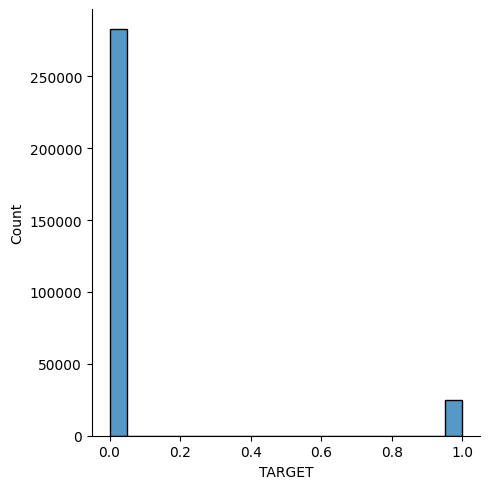

In [246]:
sns.displot(train_data['TARGET'])

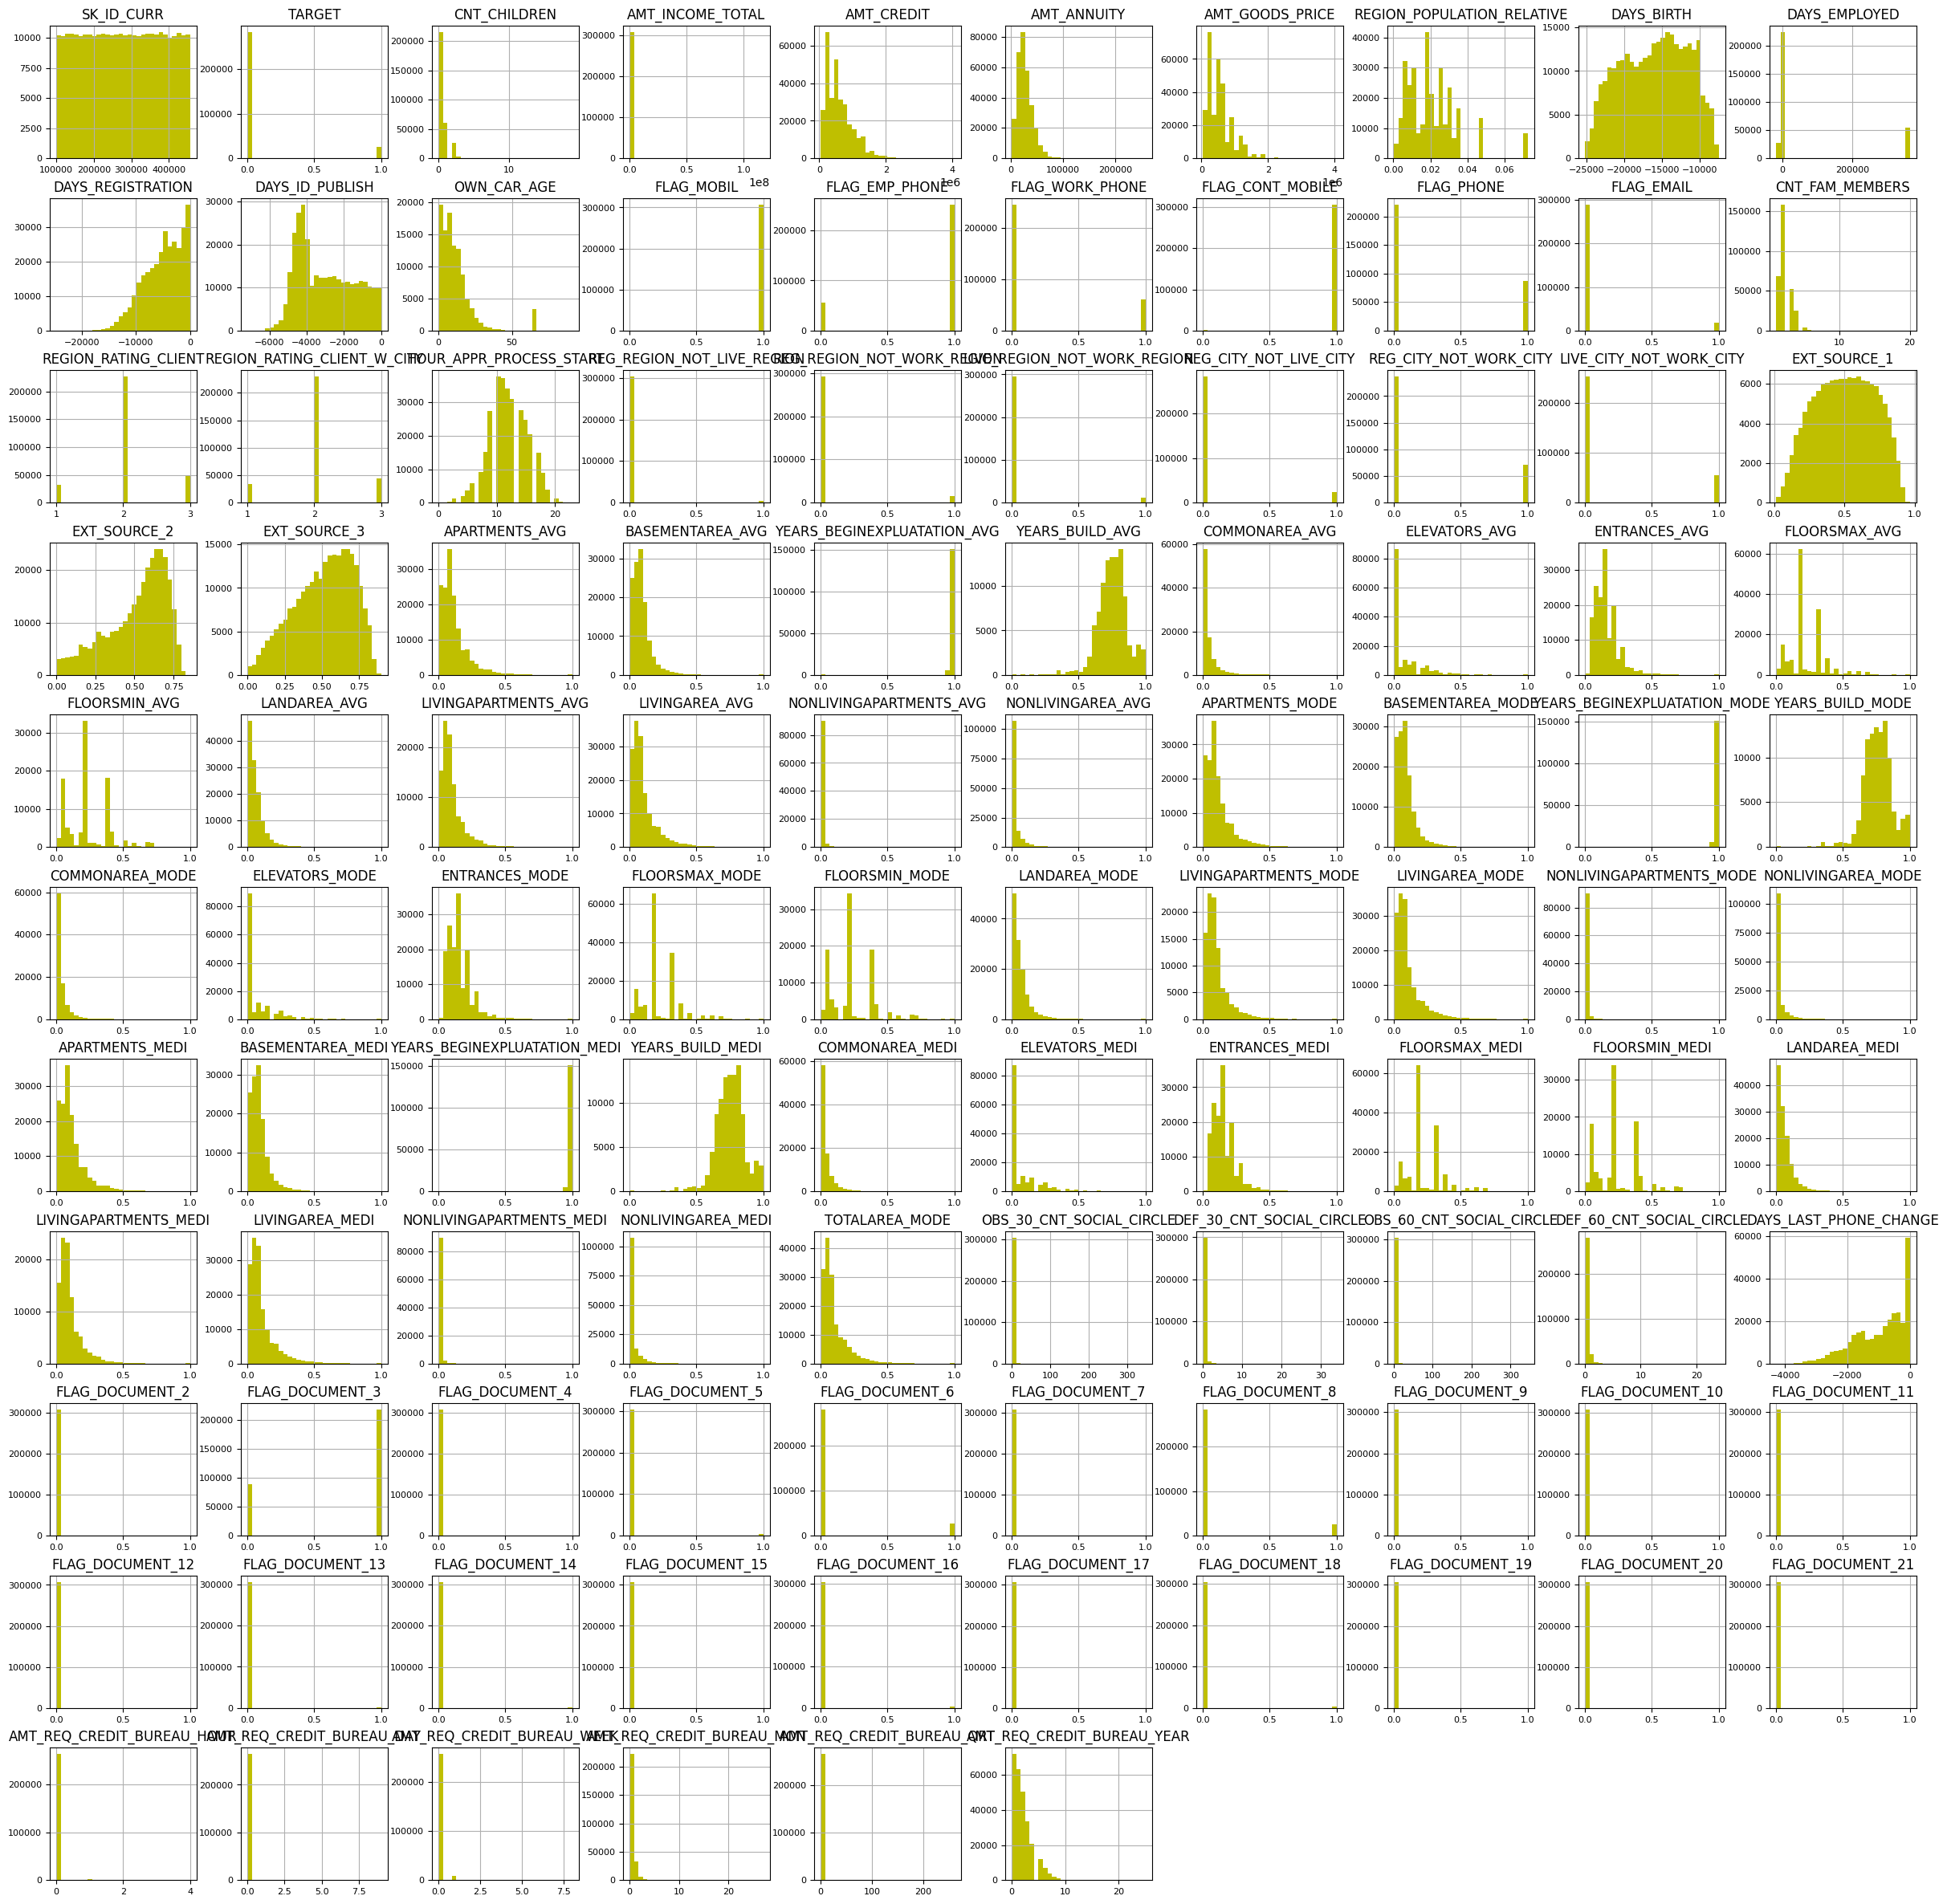

In [250]:
# clear that training data set is imbalanced 
# let's look at the distribution of numerical features in the train data dataset
numerical_features = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_data.select_dtypes(exclude=['int64', 'float64']).columns 
train_data[numerical_features].hist(figsize=(30, 30), color='y', bins=30, xlabelsize=8, ylabelsize=8)
plt.show()

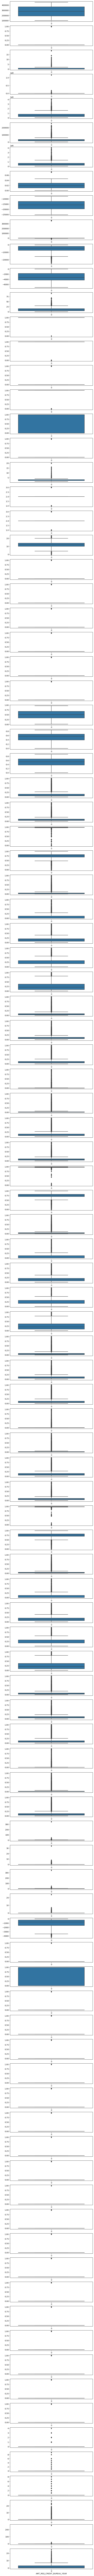

In [252]:
# create a subplots grid with one column for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 30))
# set the figure size
fig.set_size_inches(8,250)
# loop through each numerical feature and create a boxplot
for i, col in enumerate(numerical_features):
    # plot the boxplot on the corresponding axis
    sns.boxplot(train_data[col], ax=axes[i])
    # set the x-label as the feature name
    axes[i].set_xlabel(col)
plt.show()

In [251]:
import numpy as np

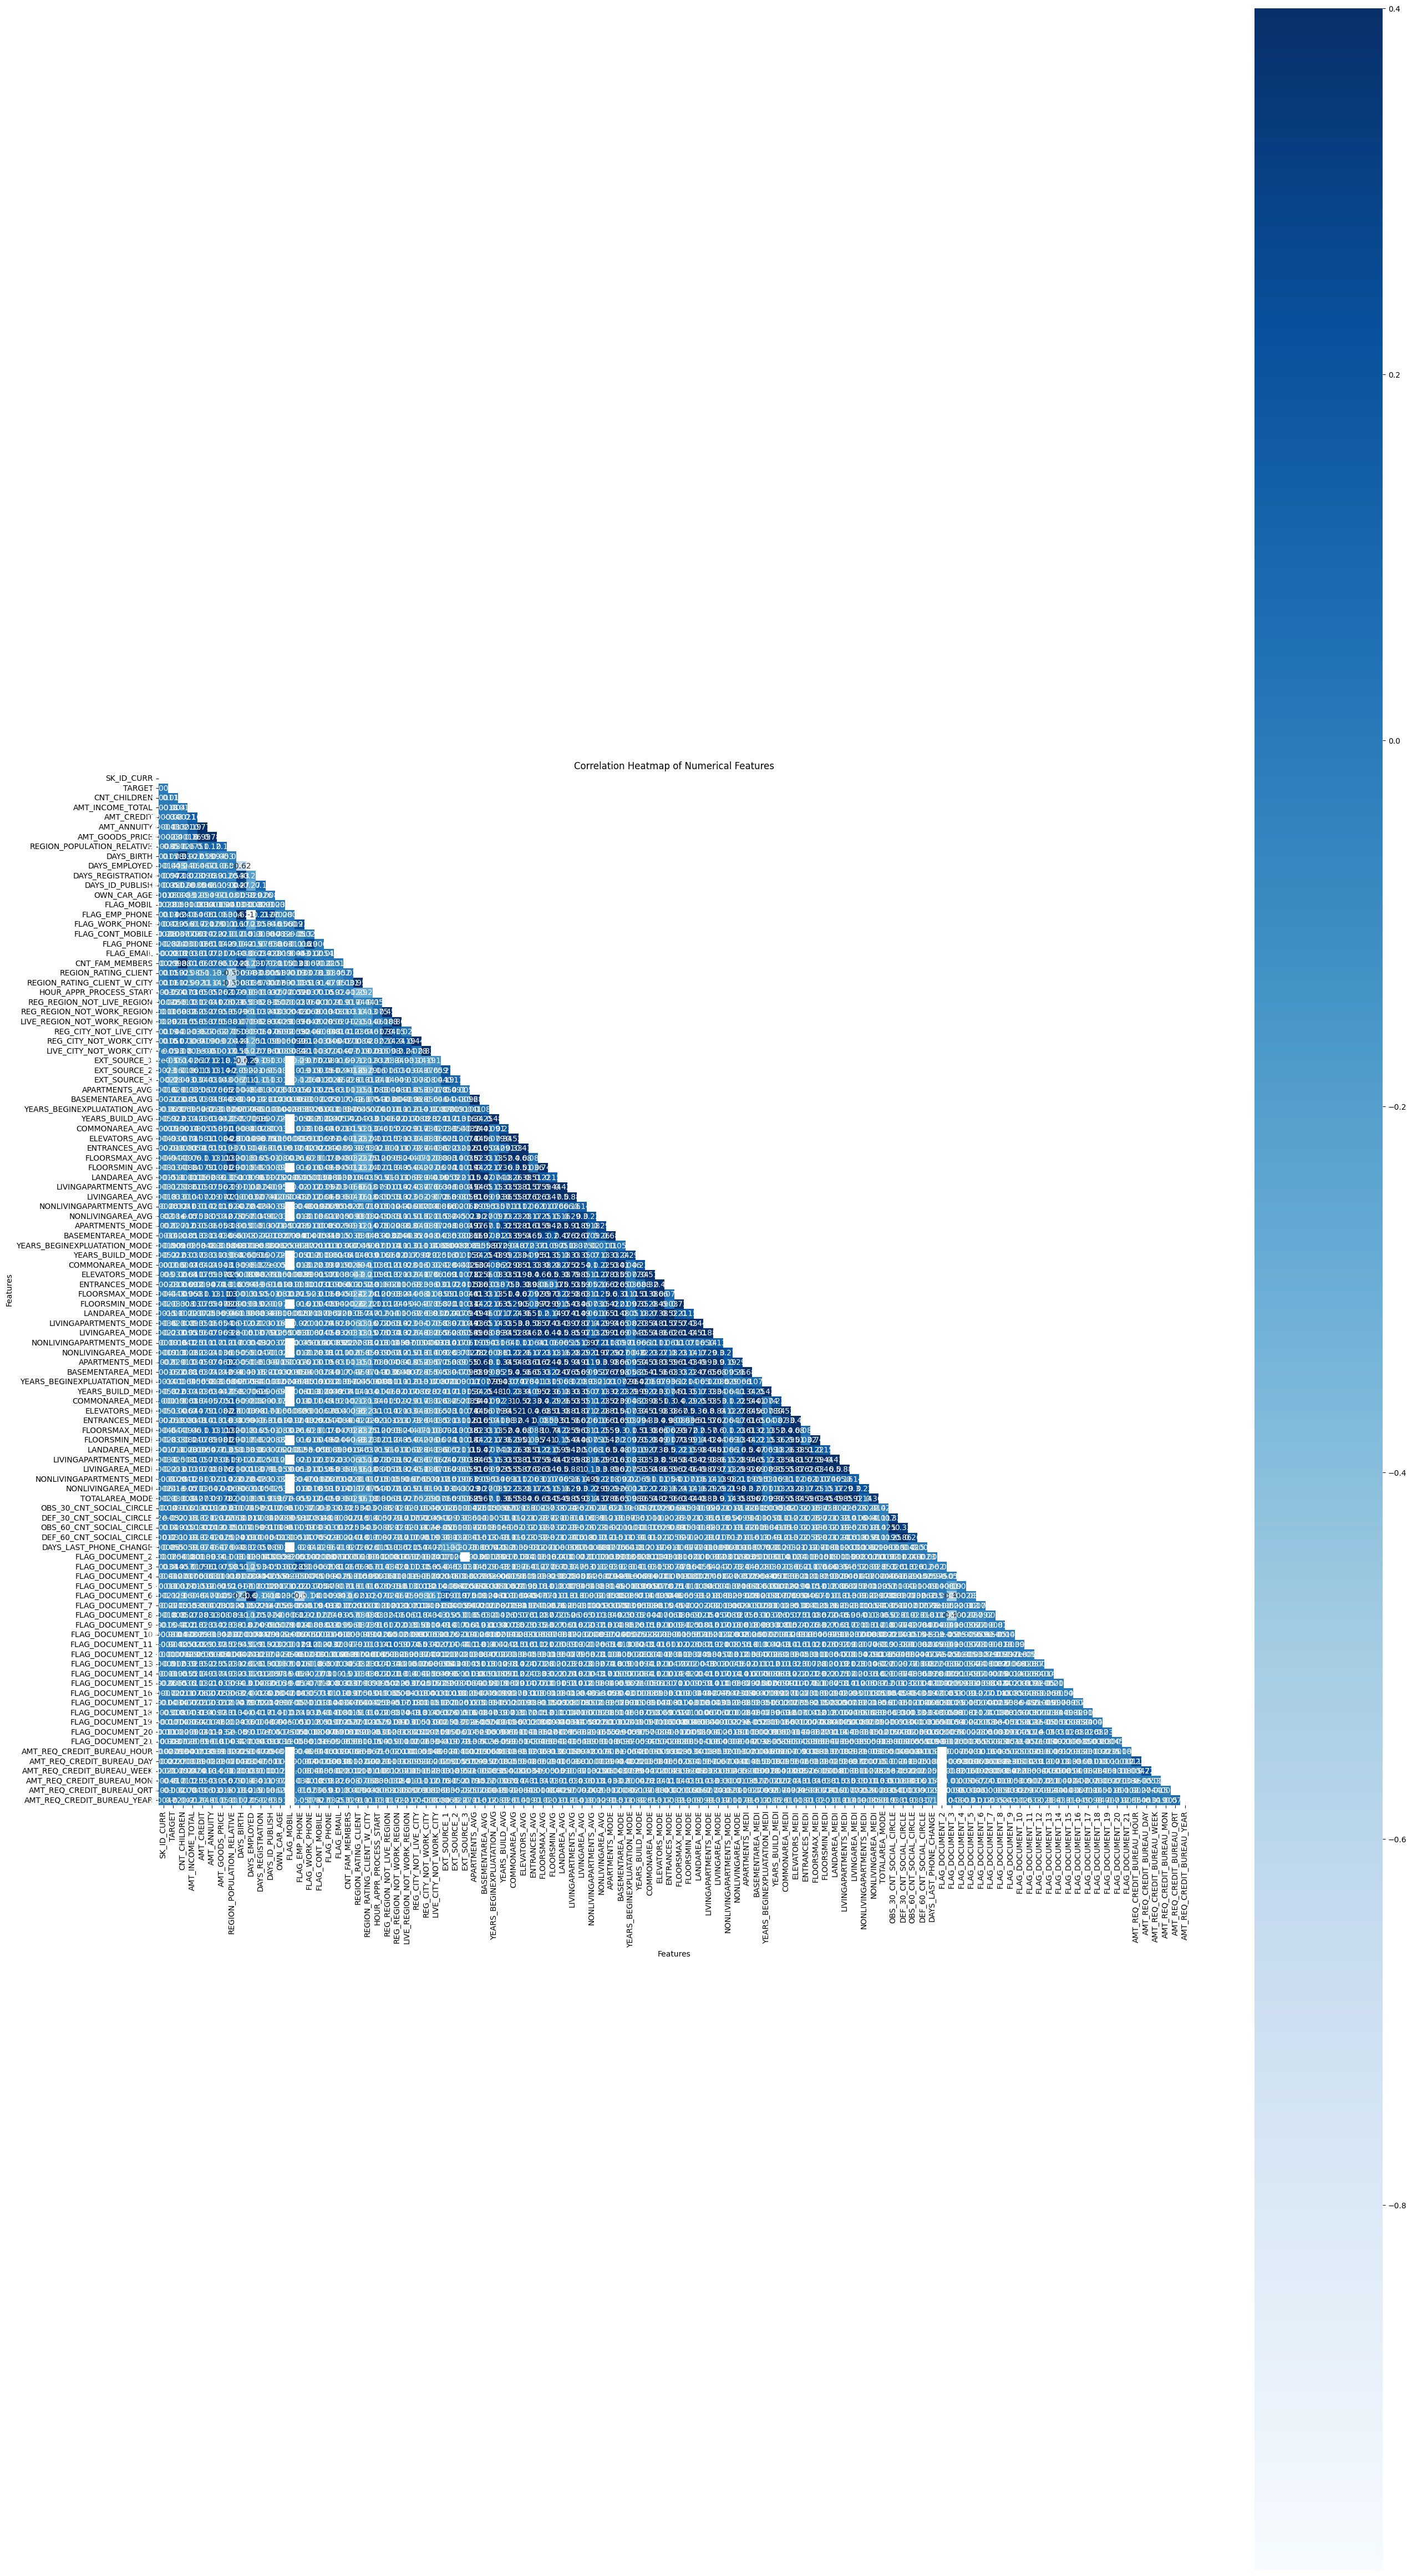

In [161]:
# Calculate correlation matrix
corrMatt = train_data[numerical_features].corr()

# Create a mask to hide lower triangle of the heatmap
mask = np.triu(np.ones_like(corrMatt, dtype=bool))

# Create a heatmap
fig, ax = plt.subplots(figsize=(30, 60))
sns.heatmap(corrMatt, cmap="Blues", mask=mask, vmax=0.4, square=True, annot=True, ax=ax)

# Set title and labels
ax.set_title("Correlation Heatmap of Numerical Features")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Show the plot
plt.show()

In [228]:
# Read train_data and test_data
test_data = pd.read_csv("application_test.csv")
train_data = pd.read_csv("application_train.csv")

# Select features
features = ["TARGET","CODE_GENDER","NAME_CONTRACT_TYPE","FLAG_OWN_CAR","CNT_CHILDREN","FLAG_OWN_REALTY", 
            "AMT_INCOME_TOTAL", "AMT_CREDIT", "EXT_SOURCE_3", "EXT_SOURCE_2", "DAYS_EMPLOYED","DAYS_BIRTH",
            "NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE", "AMT_GOODS_PRICE" 
]

# Remove target column from selected_train_data
selected_train_data = train_data[features]
features.remove("TARGET") # No target in the test set

# Select features for selected_test_data
selected_test_data = test_data[features]

# Divide features into numerical and categorical features using list comprehensions
numerical_features = [feature for feature in features if train_data[feature].dtype != 'object']
categorical_features = [feature for feature in features if train_data[feature].dtype == 'object']

In [229]:
# printing the ratio of missing values in percentage
nulled_test_values = selected_test_data.isnull()
total_missed_test = nulled_test_values.sum().sort_values(ascending=False)
percent_missed_test = (nulled_test_values.sum()/nulled_test_values.count()*100).sort_values(ascending=False)

total_percent_missed_test = pd.concat([total_missed_test, percent_missed_test], axis=1,
                                      keys=["Count", "%"])

total_percent_missed_test

Count          %
EXT_SOURCE_3          8668  17.782701
EXT_SOURCE_2             8   0.016412
CODE_GENDER              0   0.000000
NAME_CONTRACT_TYPE       0   0.000000
FLAG_OWN_CAR             0   0.000000
CNT_CHILDREN             0   0.000000
FLAG_OWN_REALTY          0   0.000000
AMT_INCOME_TOTAL         0   0.000000
AMT_CREDIT               0   0.000000
DAYS_EMPLOYED            0   0.000000
DAYS_BIRTH               0   0.000000
NAME_EDUCATION_TYPE      0   0.000000
NAME_INCOME_TYPE         0   0.000000
AMT_GOODS_PRICE          0   0.000000

In [169]:
#imports
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [172]:
# define the pipeline for numerical data
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# define the pipeline for categorical data
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# define the column transformer for data transformation
prepr = ColumnTransformer(
    transformers = [
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

In [235]:
# fit the ColumnTransformer on the training data
prepr.fit(train_data.drop("TARGET", axis=1))

# transform the training data and test data
train_x = prepr.transform(train_data.drop("TARGET", axis=1))
test_x = prepr.transform(test_data[numerical_features + categorical_features])

# extract the target variable from the training data
train_y = train_data["TARGET"]

In [238]:
# split the training data into training set and validation set
train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size=0.2)


In [247]:
# Create and fit a logistic regression model
classifying_model = LogisticRegression(class_weight="balanced", max_iter=2000)
classifying_model.fit(train_split_x, train_split_y)

# Make predictions on the training data and validation data
prediction_train = classifying_model.predict(train_split_x)
validate = classifying_model.predict(validate_x)

# Print accuracy and ROC-AUC scores for the training data
print("Train data:")
print("Correctly classified: ", accuracy_score(train_split_y, prediction_train))
print("Validation ROC_AUC: ", roc_auc_score(train_split_y, prediction_train))

# Print accuracy and ROC-AUC scores for the validation data
print("Validation:")
print("Correctly classified: ", accuracy_score(validate_y, validate))
print("Validation ROC_AUC: ", roc_auc_score(validate_y, validate))

Train data:
Correctly classified:  0.6802543006731488
Validation ROC_AUC:  0.6730453069987338
Validation:
Correctly classified:  0.6826008487390859
Validation ROC_AUC:  0.6797403150251206


In [248]:
# predicting probabilities for the test data
probs = classifying_model.predict_proba(test_x)

In [249]:
# saving results
pd.DataFrame({
    "SK_ID_CURR": test_data["SK_ID_CURR"],
    "TARGET": [pr[1] for pr in probs]
}).to_csv("my_results.csv",index=False)